In [19]:
!pip install xgboost

  Using cached xgboost-1.3.3-py3-none-win_amd64.whl (95.2 MB)


# Data Acquisicion
---

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv')
df.to_csv('../data/01_raw/ifood_dataset.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Analysing Dataset
___

<AxesSubplot:>

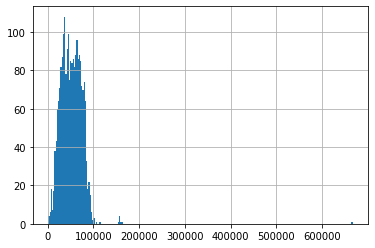

In [3]:
df["Income"].hist(bins=250)

<AxesSubplot:>

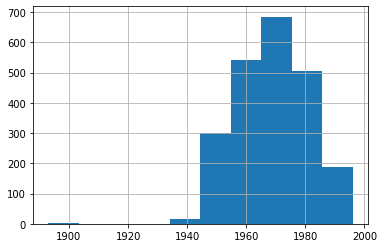

In [4]:
df.Year_Birth.hist()

In [4]:
df.corr()["Response"]

ID                    -0.021968
Year_Birth             0.021325
Income                 0.133047
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
MntWines               0.247254
MntFruits              0.125289
MntMeatProducts        0.236335
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntGoldProds           0.139850
NumDealsPurchases      0.002238
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
NumStorePurchases      0.039363
NumWebVisitsMonth     -0.003987
AcceptedCmp3           0.254258
AcceptedCmp4           0.177019
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp2           0.169293
Complain              -0.001707
Z_CostContact               NaN
Z_Revenue                   NaN
Response               1.000000
Name: Response, dtype: float64

In [5]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# Preprocessing data
---

### Remove Null values

In [7]:
df.fillna(0, inplace=True)

### Segregating train and test data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Segregate between labels and features
label = df["Response"]
feat_cols = df.columns.tolist()
feat_cols.remove("Response")
feat = df[feat_cols]

X_train, X_test, y_train, y_test = train_test_split(feat, label, random_state=1)

### Processing String columns

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = dict()
cat_cols = ["Education", "Marital_Status"]
for col in cat_cols:
    le[col] = LabelEncoder()
    X_train[col] = le[col].fit_transform(X_train[col])

c:\users\lucas\anaconda3\envs\ifood\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Processing date

In [13]:
from datetime import datetime

X_train["Dt_Customer"] = X_train["Dt_Customer"].apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
X_train["Year"] = X_train["Dt_Customer"].apply(lambda d: d.year)
X_train["Month"] = X_train["Dt_Customer"].apply(lambda d: d.month)
X_train["Day"] = X_train["Dt_Customer"].apply(lambda d: d.day)
X_train["time_as_customer"] = X_train["Dt_Customer"].apply(lambda d: (datetime.now() - d).days)

X_train.drop(columns=["Dt_Customer"], inplace=True)

c:\users\lucas\anaconda3\envs\ifood\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lucas\anaconda3\envs\ifood\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\lucas\anaconda3\envs\ifood\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

### Normalizing dataset

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_ = ss.fit_transform(X_train)

### Balancing dataset

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_, y_ = SMOTE().fit_resample(X_, y_train)

# Training machine learnin model
---

In [30]:
import xgboost as xgb

clf = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=15,
    scale_pos_weight=100000,
    use_label_encoder=False
)

clf.fit(X_, y_)

[14:40:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=100000, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# Validating model
---

In [35]:
X_test_save = X_test.copy()

for col in cat_cols:
    X_test[col] = le[col].transform(X_test[col])

X_test["Dt_Customer"] = X_test["Dt_Customer"].apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
X_test["Year"] = X_test["Dt_Customer"].apply(lambda d: d.year)
X_test["Month"] = X_test["Dt_Customer"].apply(lambda d: d.month)
X_test["Day"] = X_test["Dt_Customer"].apply(lambda d: d.day)
X_test["time_as_customer"] = X_test["Dt_Customer"].apply(lambda d: (datetime.now() - d).days)

X_test.drop(columns=["Dt_Customer"], inplace=True)

X_test = ss.transform(X_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

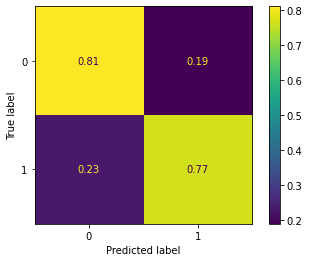

In [36]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, normalize="true")

In [37]:
y_hat = clf.predict(X_test)

y_hat

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [38]:
X_test_save["Prediction"] = y_hat

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [34]:
X_test_save.where(X_test_save["Prediction"] == 1).dropna().ID

AttributeError: 'numpy.ndarray' object has no attribute 'where'